In [2]:
import numpy as np 
import pandas as pd
import matplotlib as mt
import seaborn as sns

In [3]:
df = pd.read_csv("adult.data.csv",encoding="unicode_escape")

In [4]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# Race Analysis

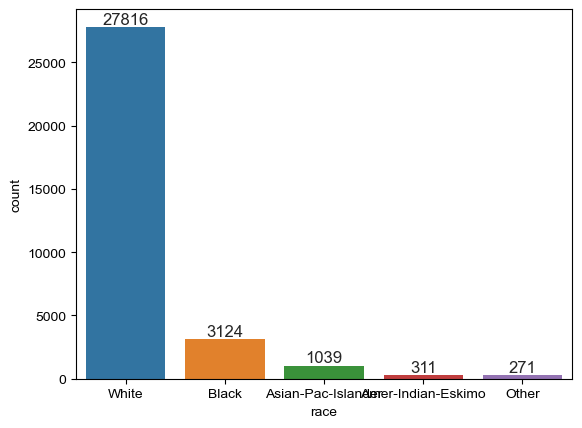

In [5]:
ax = sns.countplot(x="race",data=df)
sns.set(rc={"figure.figsize":(15,7)})
for bars in ax.containers:
    ax.bar_label(bars)

# What is the average age of men

In [49]:
average_age_men = df.loc[df['sex'] == 'Male', 'age'].mean()

In [7]:
average_age_men

39.43354749885268

# What is the percentage of people who have a Bachelor's degree?

In [19]:
bachelor = df['education'] == 'Bachelors'
    #print('BACHELORS', bachelor)
bachelor_total = df.loc[bachelor].value_counts().sum()
educated = df['education'].value_counts().sum()
percentage_bachelors = round(bachelor_total * 100 / educated, 1)
percentage_bachelors

16.4

# What percentage of people with advanced education (Bachelors, Masters, or Doctorate) make more than 50K?

In [22]:
master = df['education'] == 'Masters'
doctor = df['education'] == 'Doctorate'
higher_education = bachelor | master | doctor
    #print('HI ED GROUP', higher_education)

lower_education = (df['education'] != 'Bachelors') & (df['education'] != 'Masters') & (df['education'] != 'Doctorate')
    #print('LO ED GROUP', lower_education)

    # percentage with salary >50K
hi_ed_rich = df.loc[higher_education & (df['salary'] == '>50K')].value_counts().sum()
hi_ed_total = df.loc[bachelor | master | doctor].value_counts().sum()
    #print('HI ED RICH', hi_ed_rich)
higher_education_rich = round(hi_ed_rich * 100 / hi_ed_total, 1)

lo_ed_rich = df.loc[lower_education & (df['salary'] == '>50K')].value_counts().sum()
lo_ed_total = df.loc[lower_education].value_counts().sum()
    #print('LO ED RICH', lo_ed_rich)
lower_education_rich = round(lo_ed_rich * 100 / lo_ed_total, 1)
higher_education_rich


46.5

In [23]:
lower_education_rich

17.4

# What is the minimum number of hours a person works per week?

In [12]:
min_hrs = df["hours-per-week"].min()

In [13]:
min_hrs

1

# What percentage of the people who work the minimum number of hours per week have a salary of more than 50K?

In [31]:
num_min_workers = df.loc[df['hours-per-week'] == 1 & (df['salary'] == '>50K')].value_counts().sum()
print('MIN WORKERS RICH', num_min_workers)

rich_percentage = round(num_min_workers * 100 / df.loc[df['hours-per-week'] == 1].value_counts().sum(), 1)
print('RICH PERCENTAGE', rich_percentage)

MIN WORKERS RICH 2
RICH PERCENTAGE 10.0


# What country has the highest percentage of people that earn >50K and what is that percentage?

In [47]:
rich_pop_by_country = df.loc[df['salary'] == '>50K', 'native-country'].value_counts()
country_population = df['native-country'].value_counts()
print('POPULATION BY COUNTRY', country_population)
print('RICH BY COUNTRY', rich_pop_by_country)

rich_percent_by_country = round(rich_pop_by_country * 100 / country_population, 2)
print('% RICH BY COUNTRY', rich_percent_by_country)
highest_earning_country = rich_percent_by_country.idxmax()
print('RICHEST COUNTRY', highest_earning_country)
highest_earning_country_percentage = round(rich_percent_by_country.max(), 1)
print('HIGHETS %RICH', highest_earning_country_percentage)   

POPULATION BY COUNTRY United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France

# Identify the most popular occupation for those who earn >50K in India.

In [48]:
india = df['native-country'] == 'India'
india_rich = df.loc[india & (df['salary'] == '>50K'), 'occupation'].value_counts()
print('INDIA RICH', india_rich)
top_IN_occupation = india_rich.idxmax()
print('TOP OCCUPATION', top_IN_occupation)

INDIA RICH Prof-specialty      25
Exec-managerial      8
Other-service        2
Tech-support         2
Transport-moving     1
Sales                1
Adm-clerical         1
Name: occupation, dtype: int64
TOP OCCUPATION Prof-specialty
